Base Iris - Uninove

# Bibliotecas

In [24]:

library(factoextra)
library(cluster)
library(csv)
library(xlsx)
library(arules)
library(caTools)
library(rpart)
library(rpart.plot)
library(caret)
library(e1071)
library(ROCR)
library(pROC)
library(PRROC)
library(caret)

In [6]:
Data <- iris

  Sepal.Length    Sepal.Width     Petal.Length    Petal.Width   
 Min.   :4.300   Min.   :2.000   Min.   :1.000   Min.   :0.100  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.600   1st Qu.:0.300  
 Median :5.800   Median :3.000   Median :4.350   Median :1.300  
 Mean   :5.843   Mean   :3.057   Mean   :3.758   Mean   :1.199  
 3rd Qu.:6.400   3rd Qu.:3.300   3rd Qu.:5.100   3rd Qu.:1.800  
 Max.   :7.900   Max.   :4.400   Max.   :6.900   Max.   :2.500  
       Species  
 setosa    :50  
 versicolor:50  
 virginica :50  
                
                
                

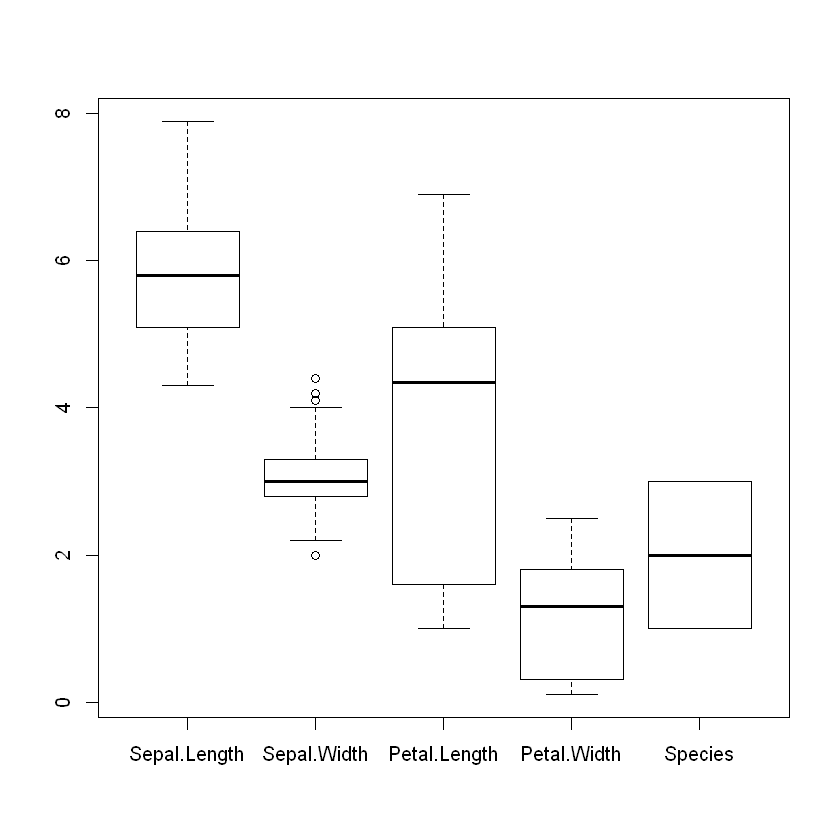

In [7]:
#Boxplot
boxplot(iris)

#Sumário
summary(iris)

In [12]:
#Dividindo conjunto em treino e teste

set.seed(1)


divisao = sample.split(iris$Species, SplitRatio = 0.8)
base_treinamento = subset(iris, divisao == TRUE)
base_teste = subset(iris, divisao == FALSE)

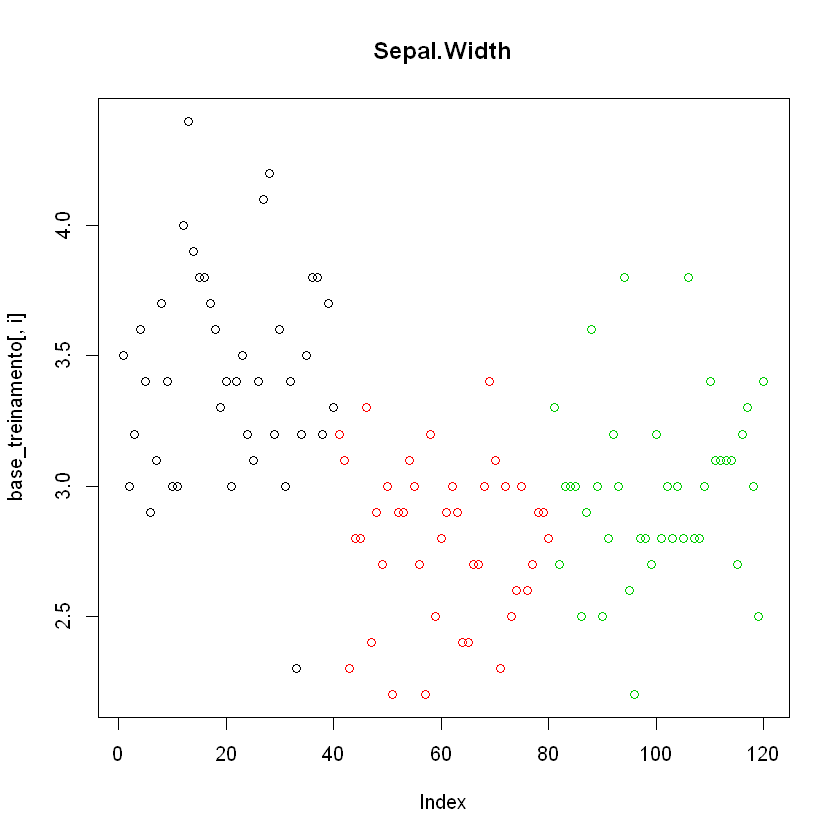

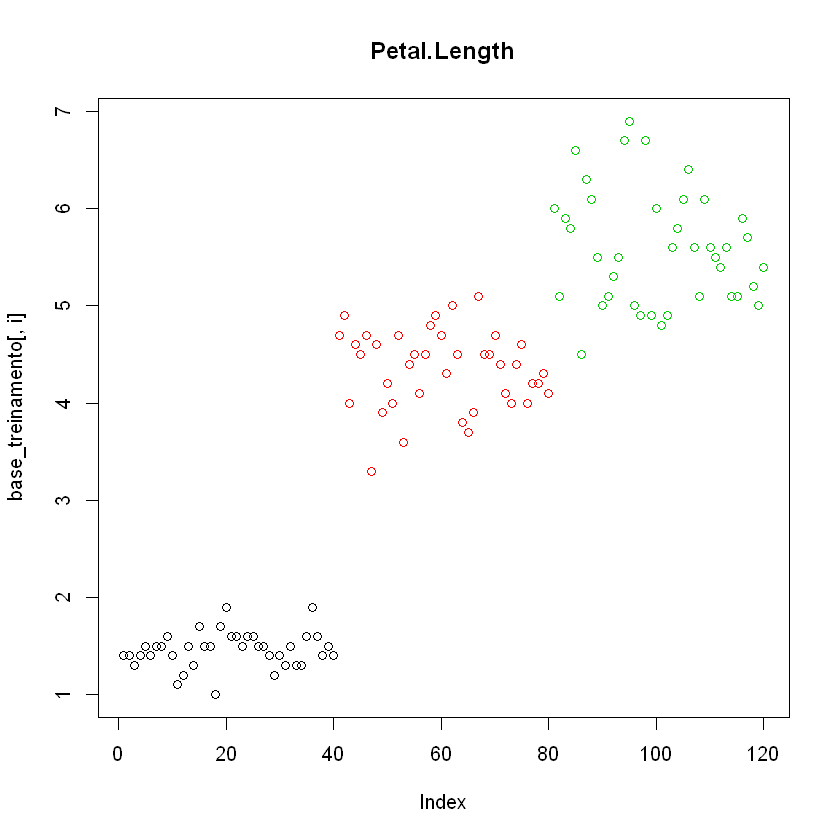

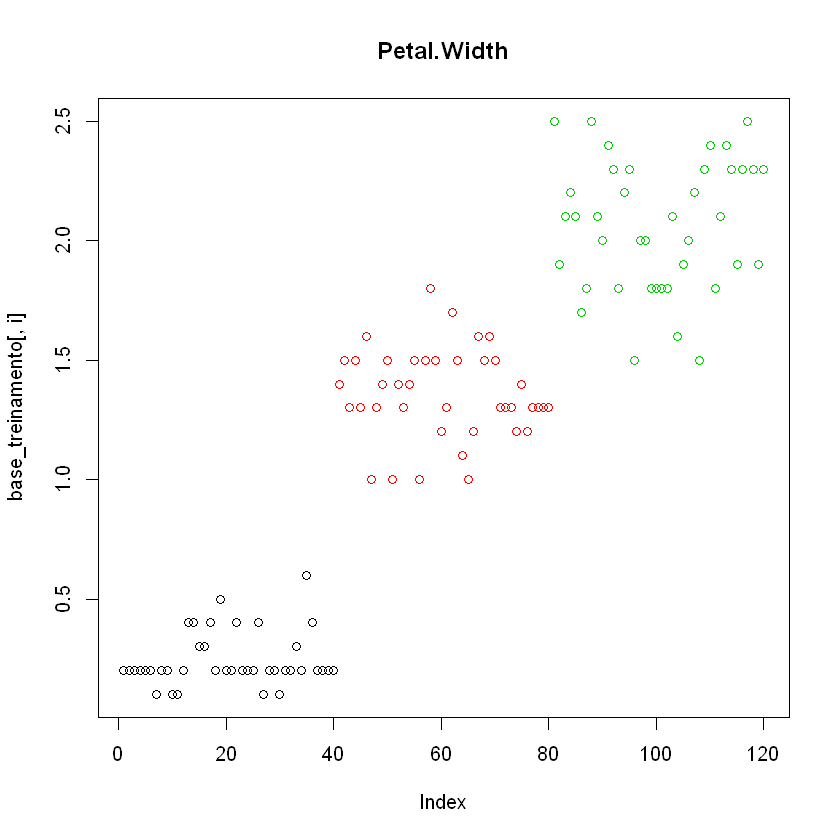

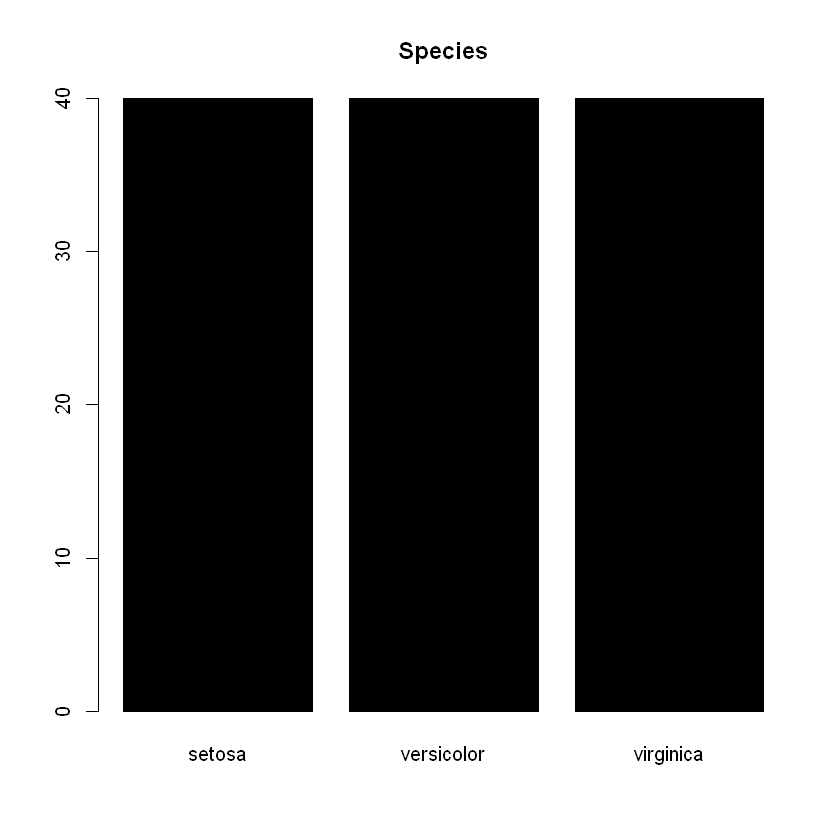

In [13]:
for (i in 2:5) {
  plot(base_treinamento[,i], col=base_treinamento$Species ,
       main=names(base_treinamento)[i])
}

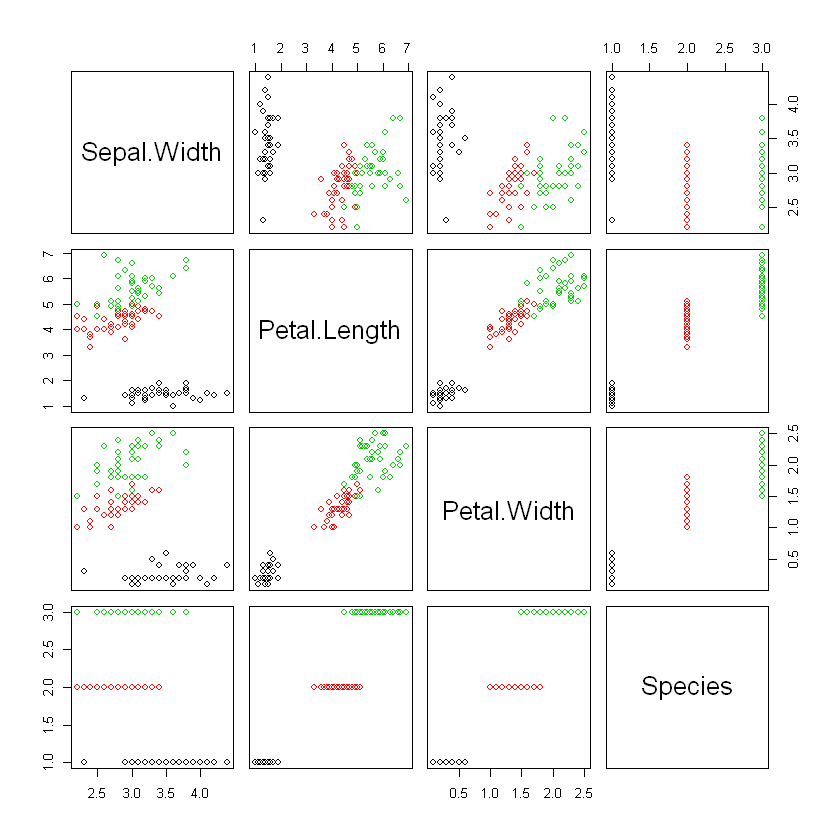

In [14]:
plot(base_treinamento[,-1],col = base_treinamento$Species)


n= 120 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

1) root 120 80 setosa (0.33333333 0.33333333 0.33333333)  
  2) Petal.Length< 2.6 40  0 setosa (1.00000000 0.00000000 0.00000000) *
  3) Petal.Length>=2.6 80 40 versicolor (0.00000000 0.50000000 0.50000000)  
    6) Petal.Width< 1.75 43  4 versicolor (0.00000000 0.90697674 0.09302326) *
    7) Petal.Width>=1.75 37  1 virginica (0.00000000 0.02702703 0.97297297) *


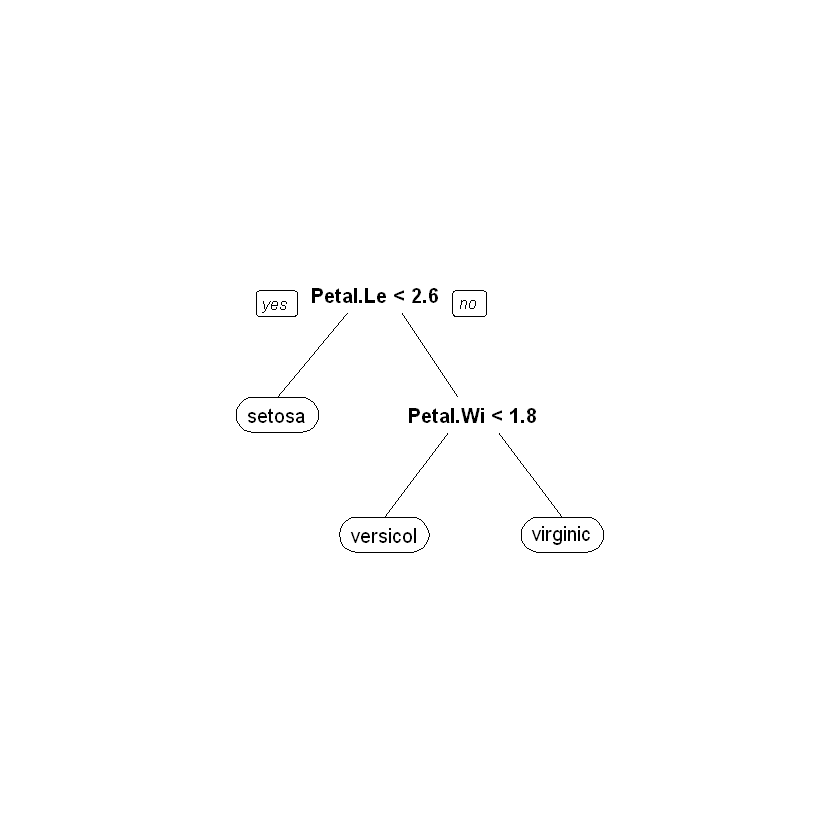

In [16]:
#Criando um classificador
classificador = rpart(formula = Species ~., data = base_treinamento)
print(classificador)
prp(classificador)

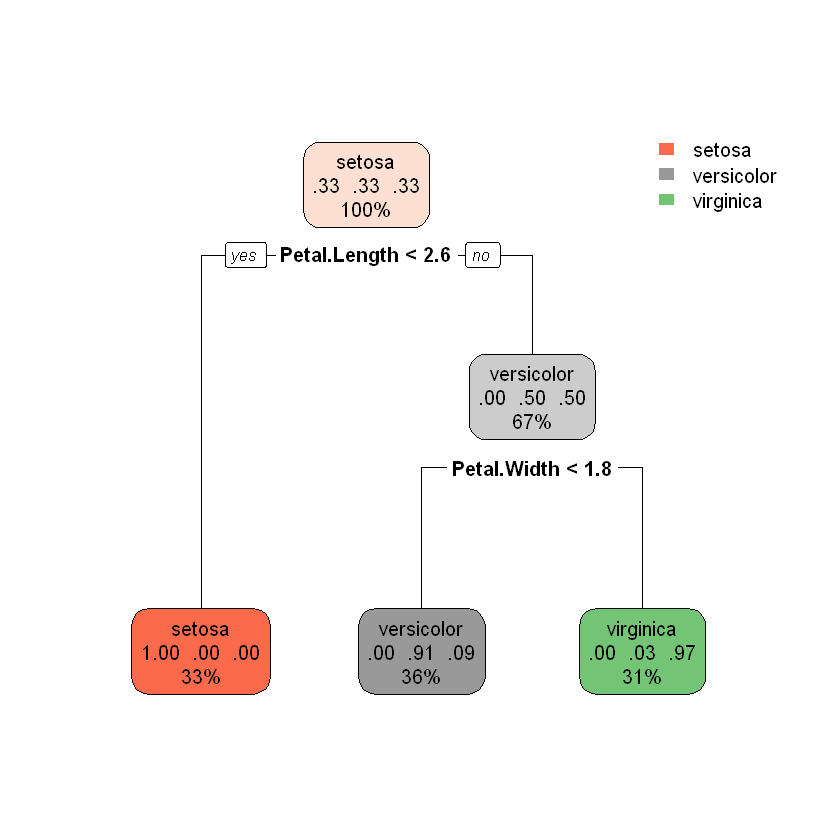

In [17]:
#Mostrando a árvore de decisão
rpart.plot(classificador)

In [18]:
#Mostrando previsões

previsao = predict(classificador, newdata = base_treinamento[-5])
previsao


,setosa,versicolor,virginica
1,1,0,0
2,1,0,0
3,1,0,0
5,1,0,0
8,1,0,0
9,1,0,0
10,1,0,0
11,1,0,0
12,1,0,0
13,1,0,0


In [21]:
#Matriz de confusão e resultados

previsoes = predict(classificador, newdata = base_treinamento[-5], type = 'class')
previsoes
matriz_confusao = table (base_treinamento[,5], previsoes)
print(matriz_confusao)


1          2          3          5          8          9         10 
    setosa     setosa     setosa     setosa     setosa     setosa     setosa 
        11         12         13         14         15         16         17 
    setosa     setosa     setosa     setosa     setosa     setosa     setosa 
        19         20         22         23         24         25         26 
    setosa     setosa     setosa     setosa     setosa     setosa     setosa 
        27         28         30         31         32         33         34 
    setosa     setosa     setosa     setosa     setosa     setosa     setosa 
        36         38         39         40         42         43         44 
    setosa     setosa     setosa     setosa     setosa     setosa     setosa 
        45         47         48         49         50         51         53 
    setosa     setosa     setosa     setosa     setosa versicolor versicolor 
        54         55         56         57         58         59         60 
versicolor versicolor versicolor versicolor versicolor versicolor versicolor 
        62         63         64         65         66         67         68 
versicolor versicolor versicolor versicolor versicolor versicolor versicolor 
        69         71         73         74         75         78         79 
versicolor  virginica versicolor versicolor versicolor versicolor versicolor 
        81         82         83         84         85         86         87 
versicolor versicolor versicolor versicolor versicolor versicolor versicolor 
        88         89         90         91         92         93         95 
versicolor versicolor versicolor versicolor versicolor versicolor versicolor 
        97         98        100        101        102        103        105 
versicolor versicolor versicolor  virginica  virginica  virginica  virginica 
       106        107        108        110        113        114        115 
 virginica versicolor  virginica  virginica  virginica  virginica  virginica 
       116        117        118        119        120        122        123 
 virginica  virginica  virginica  virginica versicolor  virginica  virginica 
       124        126        127        128        129        130        131 
 virginica  virginica  virginica  virginica  virginica versicolor  virginica 
       132        133        134        136        137        138        140 
 virginica  virginica versicolor  virginica  virginica  virginica  virginica 
       141        142        143        144        145        146        147 
 virginica  virginica  virginica  virginica  virginica  virginica  virginica 
       149 
 virginica 
Levels: setosa versicolor virginica

            previsoes
             setosa versicolor virginica
  setosa         40          0         0
  versicolor      0         39         1
  virginica       0          4        36


In [20]:
confusionMatrix(matriz_confusao)

Confusion Matrix and Statistics

            previsoes
             setosa versicolor virginica
  setosa         40          0         0
  versicolor      0         39         1
  virginica       0          4        36

Overall Statistics
                                          
               Accuracy : 0.9583          
                 95% CI : (0.9054, 0.9863)
    No Information Rate : 0.3583          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.9375          
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: setosa Class: versicolor Class: virginica
Sensitivity                 1.0000            0.9070           0.9730
Specificity                 1.0000            0.9870           0.9518
Pos Pred Value              1.0000            0.9750           0.9000
Neg Pred Value              1.0000            0.9500           0.9875
P

In [23]:
#Curva ROC

data.frame(base_treinamento)
df <- data.frame(base_treinamento) 



,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
8,5.0,3.4,1.5,0.2,setosa
9,4.4,2.9,1.4,0.2,setosa
10,4.9,3.1,1.5,0.1,setosa
11,5.4,3.7,1.5,0.2,setosa
12,4.8,3.4,1.6,0.2,setosa
13,4.8,3.0,1.4,0.1,setosa


Warning message in roc.default(df$Sepal.Width, df$Petal.Length, smoothed = TRUE, :
"'response' has more than two levels. Consider setting 'levels' explicitly or using 'multiclass.roc' instead"Setting levels: control = 2.2, case = 2.3
Setting direction: controls > cases


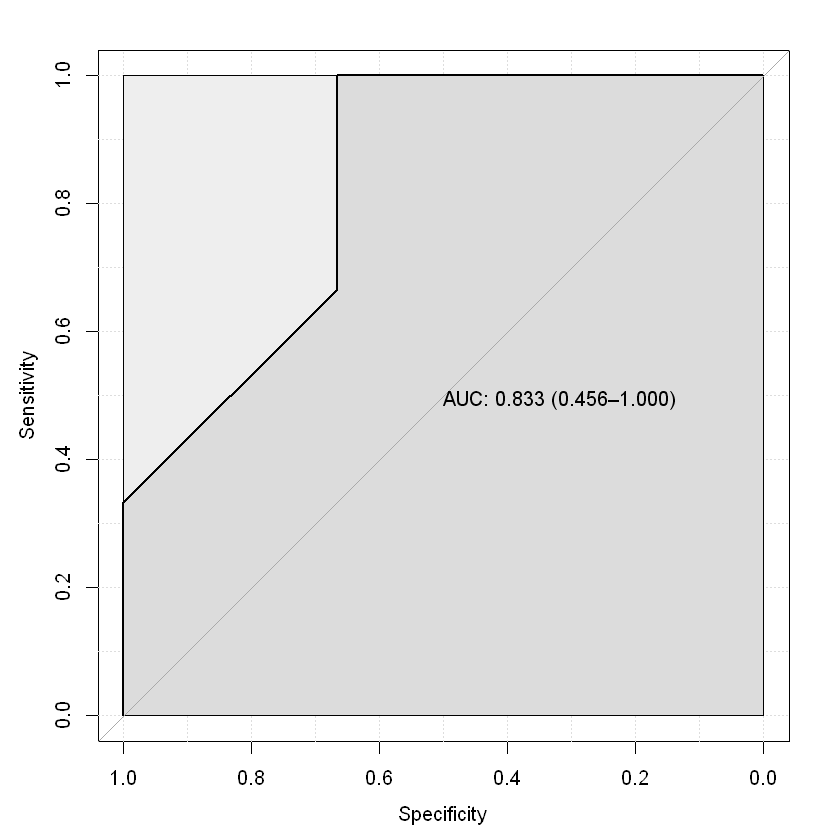

In [26]:
pROC_obj <- roc(df$Sepal.Width,df$Petal.Length,
                smoothed = TRUE,
                # arguments for ci
                ci=TRUE, ci.alpha=0, stratified=FALSE,
                # arguments for plot
                plot=TRUE, auc.polygon=TRUE, max.auc.polygon=TRUE, grid=TRUE,
                print.auc=TRUE, show.thres=TRUE)


sens.ci <- ci.se(pROC_obj)
